<a href="https://colab.research.google.com/github/srikanth703/SQL/blob/main/Aerofit_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aerofit Business Case Study on Treadmills

In [21]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# converting data into dataframe

aerofit = pd.read_csv("aerofit_treadmill.csv")

In [23]:
# making an copy of the dataset

df = aerofit.copy()

In [24]:
# Top 5 rows of the dataframe

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [25]:
# No of rows & columns

df.shape

(180, 9)

In [26]:
# Data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [27]:
# Checking of null values

df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [28]:
# Duplicate values check

df.duplicated().sum()

np.int64(0)

In [29]:
# Uniques values of each columns

df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


# Descriptive Analysis

In [30]:
# int columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [31]:
# Object columns

df.describe(include = "object").T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [32]:
# Product names

df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [33]:
# Product prices in dollars

data = {
    'Treadmill Model': ['KP281', 'KP481', 'KP781'],
    'User Level': ['Entry-Level', 'Mid-Level', 'Advanced'],
    'Price': [1500, 1750, 2500]
}
treadmill_df = pd.DataFrame(data)
treadmill_df

,Treadmill Model,User Level,Price
0,KP281,Entry-Level,1500
1,KP481,Mid-Level,1750
2,KP781,Advanced,2500


In [34]:
# Number of customers for each product types

product_counts = df['Product'].value_counts().sort_index()
product_counts

,count
Product,
KP281,80
KP481,60
KP781,40


In [35]:
# Customer distribution percentage for each product

product_percentage = round((product_counts / product_counts.sum()) * 100,1)
product_percentage

,count
Product,
KP281,44.4
KP481,33.3
KP781,22.2


**Insights :-**




## Outliers & count of outliers in each columns

In [36]:
def outliers(df, column_name):

    # Calculate quartiles and IQR for the specified column
    Q1 = np.percentile(df[column_name], 25)
    Q3 = np.percentile(df[column_name], 75)
    IQR = Q3 - Q1

    # upper bounds for outliers
    upper_band = Q3 + 1.5 * IQR

    # outliers in the specified column
    outliers_df = df[df[column_name] > upper_band]

    return outliers_df

In [37]:
# outliers in Age column

outliers(df,'Age')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [38]:
len(outliers(df,'Age')) # Count of outliers in Age column

5

In [39]:
# outliers in Education column

outliers(df,'Education')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


In [40]:
len(outliers(df,'Education')) # Count of outliers in Education column

4

In [41]:
# outliers in Usage column

outliers(df,'Usage')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


In [42]:
len(outliers(df,'Usage')) # Count of outliers in Usage column

9

In [43]:
# outliers in Income column

outliers(df,'Income')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


In [44]:
len(outliers(df,'Income')) # Count of outliers in Income column

19

In [45]:
# outliers in Miles column

outliers(df,'Miles')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


In [46]:
len(outliers(df,'Miles')) # Count of outliers in Miles column

13

In [47]:
# outliers in Fitness column

Q1_Fitness = np.percentile(df['Fitness'],25)
Q3_Fitness = np.percentile(df['Fitness'],75)
IQR = Q3_Fitness - Q1_Fitness
lower_band = Q1_Fitness - 1.5*(IQR)

Fitness_outliers = df[df['Fitness'] < lower_band]

Fitness_outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21


In [48]:
len(Fitness_outliers) # Count of outliers in Fitness column

2

In [49]:
# combining all the int columns into a list

columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]

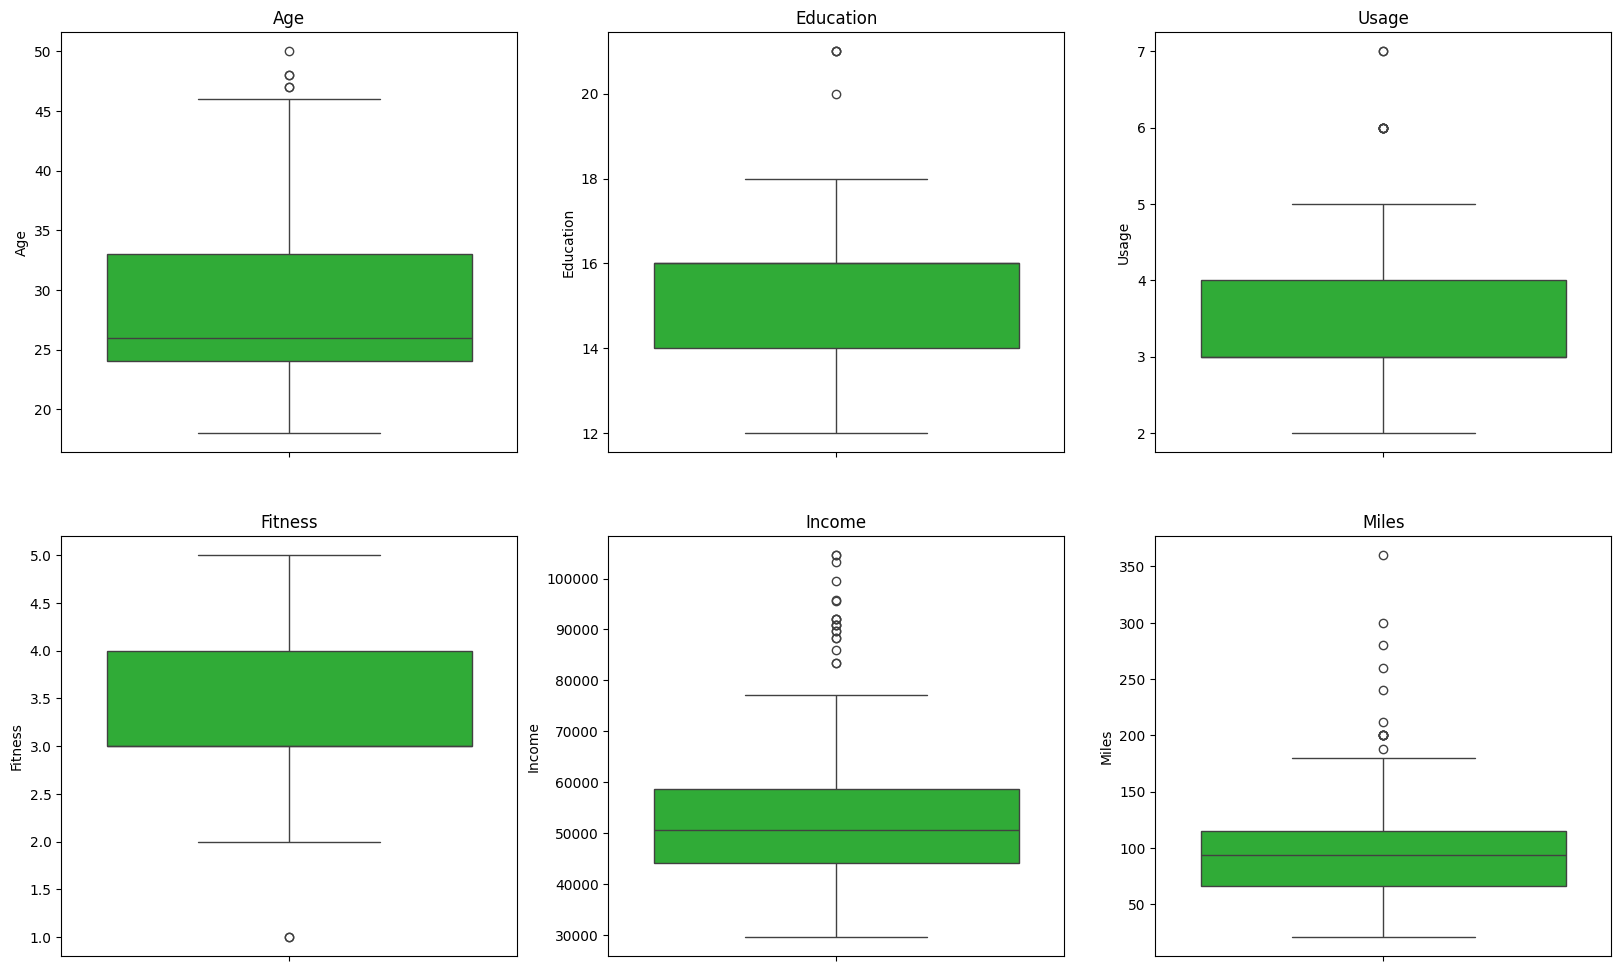

In [50]:
# Plotting the outliers using boxplots

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
sns.set(style="dark")

for i in range(2):
    for j in range(3):
        variable = columns[i * 3 + j]
        sns.boxplot(ax=axes[i, j], data=df, y=variable, color="#1BBF25")
        axes[i, j].set_title(variable)

plt.show();

#### Insights:-

**Age :** Outliers include a few exceptional individuals aged 46 and above.

**Education :** Outliers include individuals with 20 and 21 years of education.

**Usage :** Outliers include some dedicated users at 6 and 7 times per week.

**Fitness :** An outlier is present at a rating of 1.

**Income :** Outlier include customers having income more than 81,000.

**Miles :** Outliers include a few individuals exceeding 175 miles.Outliers include a few individuals exceeding 175 miles.

# Univariate Analysis

In [51]:
df[columns].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


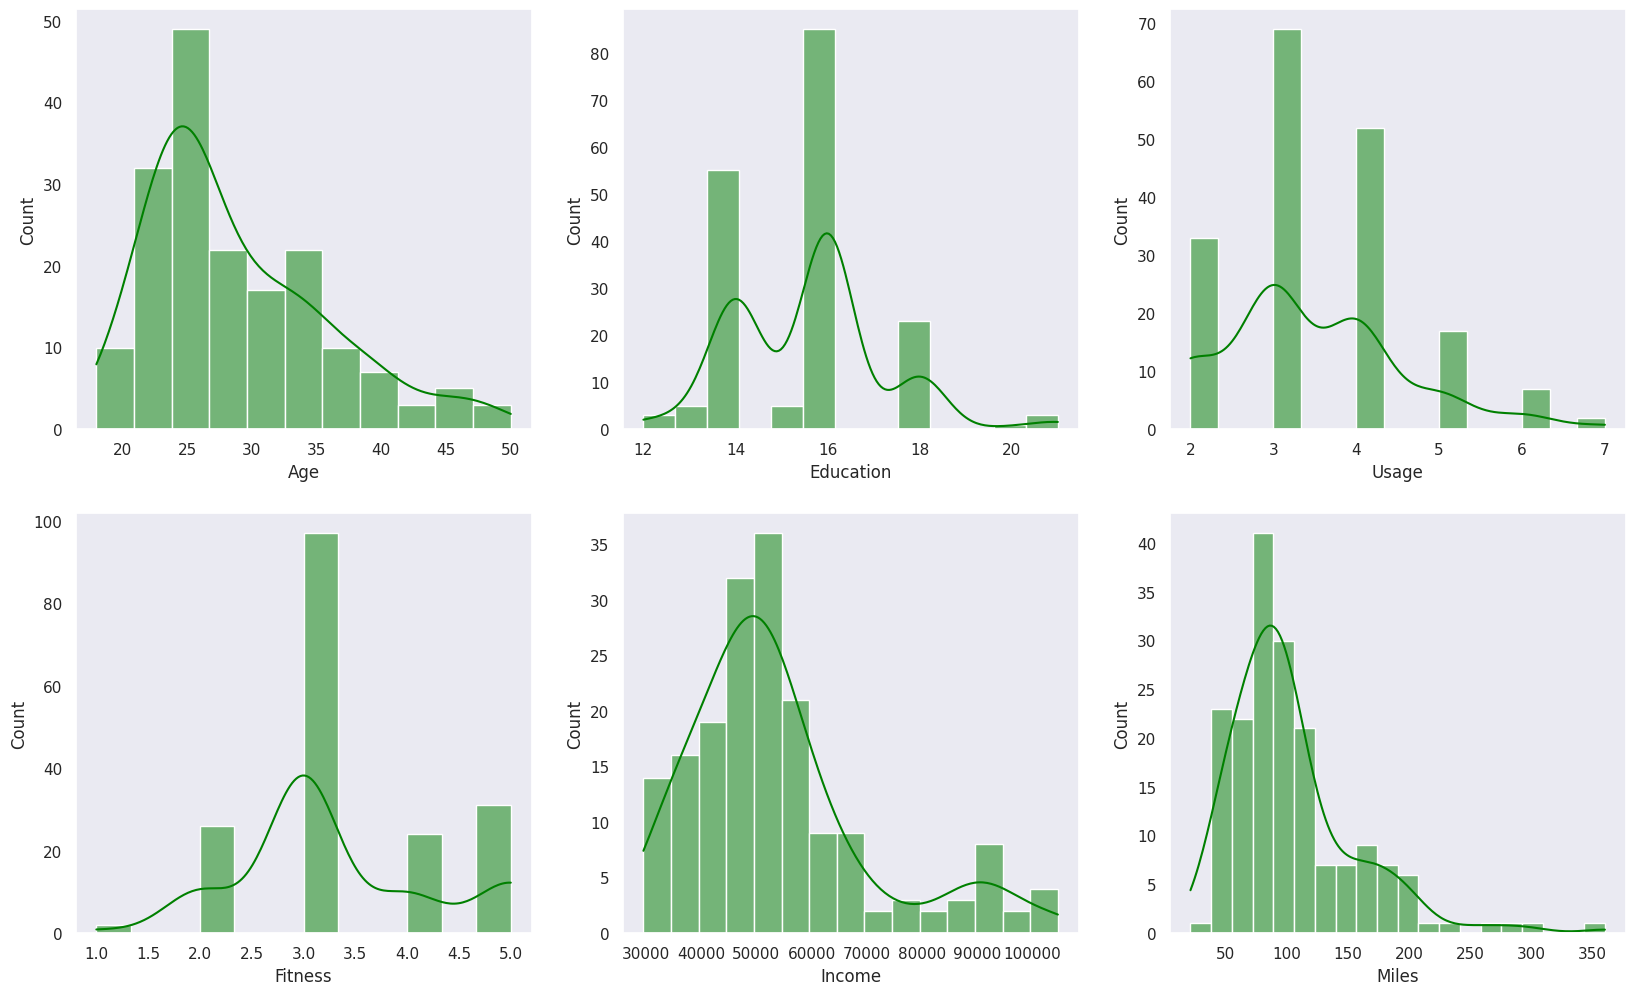

In [52]:
# Hisplot for the above mentioned columns

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
sns.set(style="darkgrid")

# Iterate through the rows and columns of the subplot grid
for i in range(2):
    for j in range(3):
        variable = columns[i * 3 + j] # Variable Assignment for Subplot Analysis
        sns.histplot(ax=axes[i, j], data=df, x=variable, kde=True, color="green")
        axes[i, j]

plt.show();

#### Insights :-

**Age:** The majority of individuals fall between age range of 24 to 33, indicating a concentration of users in the young to early-mid adulthood demographic.

**Education:** Most individuals have an education level between 14 and 16 years, with outliers having exceptionally high education levels of 20 and 21 years.

**Usage:** The average treadmill usage is 3 to 4 times per week, suggesting a moderate and consistent engagement in treadmill activities among users.

**Fitness:** The majority of users rate their fitness between 3 and 4, reflecting a moderate to good fitness level among the sample.

**Income:** The median income falls between $45,058.75 and $50,596.50, indicating a middle-income range among the sample.

**Miles:** Most individuals aim to walk between 66 and 114.75 miles weekly, with some exceeding 175 miles.

## Bivariate Analysis

In [53]:
# cross tab function

cross_tab = lambda x, y, df: pd.crosstab(df[x], df[y])

In [54]:
# Age & gender wise distribution of customers

cross_tab('Age', 'Gender', df)

Gender,Female,Male
Age,,
18,0,1
19,1,3
20,2,3
21,3,4
22,3,4
23,7,11
24,6,6
25,10,15
26,6,6


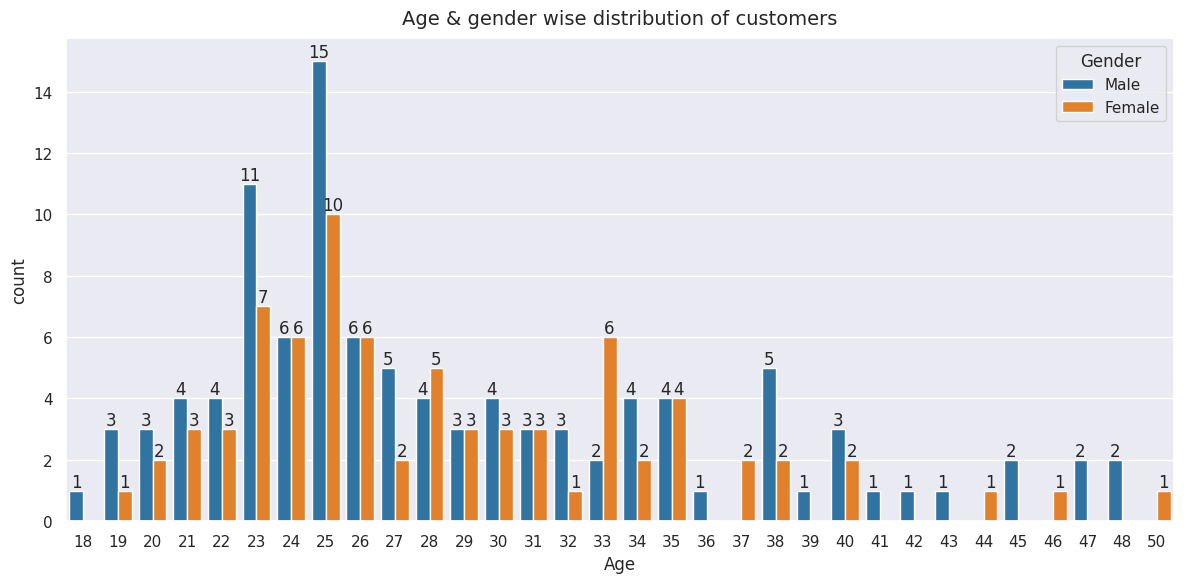

In [55]:
# Countplot on age & gender wise distribution of customers

fig, axs = plt.subplots(figsize=(12,6))

age_gender = sns.countplot(data=df, x='Age', hue='Gender', palette='tab10')
for i in age_gender.containers:
    age_gender.bar_label(i)

age_gender.set_title("Age & gender wise distribution of customers", pad=10, fontsize=14)

plt.tight_layout()
plt.show()

#### Insights:-

- The distribution of age among males and females indicates a diverse representation, with individuals ranging from 18 to 50 years old.

- In the age group between 23 and 25, there is a noticeable increase in the number of females compared to males.

In [56]:
(pd.crosstab(df['Product'],df['Gender'],margins = True, normalize = True)*100).T.round(2)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.22,16.11,3.89,42.22
Male,22.22,17.22,18.33,57.78
All,44.44,33.33,22.22,100.00


In [57]:
# gender wise distribution of each products

cross_tab('Product','Gender',df).T

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [58]:
# MartialStatus wise distribution of each products

cross_tab('Product','MaritalStatus',df).T

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


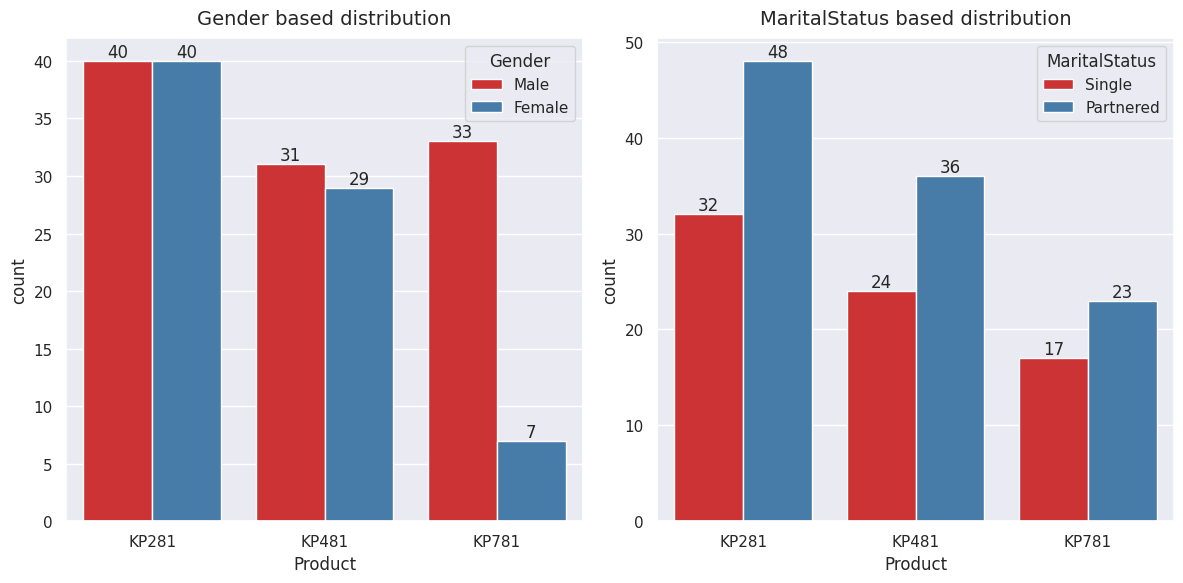

In [59]:
sns.set_style(style='darkgrid')

# size of the figure and subplots
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Gender Plot
label1 = sns.countplot(data=df, x='Product', hue='Gender', palette='Set1', ax=axs[0])
for i in label1.containers:
    label1.bar_label(i)

# Marital Plot
label2 = sns.countplot(data=df, x='Product', hue='MaritalStatus', palette='Set1', ax=axs[1])
for i in label2.containers:
    label2.bar_label(i)

# titles for subplots
axs[0].set_title("Gender based distribution", pad=10, fontsize=14)
axs[1].set_title("MaritalStatus based distribution", pad=10, fontsize=14)

plt.tight_layout()
plt.show()

#### Insights :-

- The distribution of product preferences among genders reveals that both females and males show a preference for KP281 and KP481.

- Notably, the KP781 treadmill is more popular among males, with a substantial count, while females show a lower preference for this particular product.

- For both partnered and single individuals, KP281 is the most preferred treadmill model, followed by KP481 and KP781.

- Partnered individuals show a higher overall preference for all three models compared to singles.

In [60]:
# creating bins for age

bins = [14,20,30,40,60]

labels =["Teens","Young Adults","Adults","Over 40s"]

df['AgeCategory'] = pd.cut(df['Age'], bins,labels=labels)

In [61]:
# creating bins for Income

bins_income = [29000, 35000, 60000, 85000, 105000]

labels_income = ['Low Income','Middle-class','Upper-Middle class', 'Wealthy']

df['IncomeSlab'] = pd.cut(df['Income'],bins_income,labels = labels_income)

In [62]:
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeCategory,IncomeSlab
0,KP281,18,Male,14,Single,3,4,29562,112,Teens,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Teens,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teens,Low Income


In [63]:
# AgeCategory wise distribution of each products

cross_tab('Product','AgeCategory',df).T

Product,KP281,KP481,KP781
AgeCategory,,,
Teens,6,4,0
Young Adults,49,31,30
Adults,19,23,6
Over 40s,6,2,4


In [64]:
# IncomeSlab wise distribution of each products

cross_tab('Product','IncomeSlab',df).T


Product,KP281,KP481,KP781
IncomeSlab,,,
Low Income,8,6,0
Middle-class,66,47,11
Upper-Middle class,6,7,12
Wealthy,0,0,17


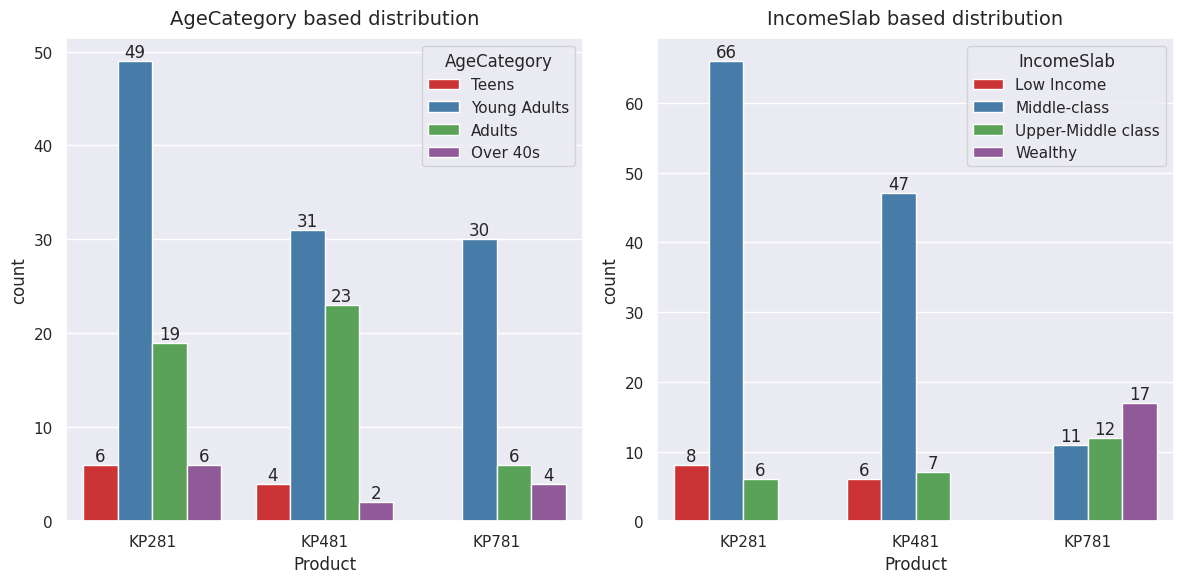

In [65]:
sns.set_style(style='darkgrid')

# size of the figure and subplots
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# AgeCategory Plot
label1 = sns.countplot(data=df, x='Product', hue='AgeCategory', palette='Set1', ax=axs[0])
for i in label1.containers:
    label1.bar_label(i)

# IncomeSlab Plot
label2 = sns.countplot(data=df, x='Product', hue='IncomeSlab', palette='Set1', ax=axs[1])
for i in label2.containers:
    label2.bar_label(i)

# titles for subplots
axs[0].set_title("AgeCategory based distribution", pad=10, fontsize=14)
axs[1].set_title("IncomeSlab based distribution", pad=10, fontsize=14)

plt.tight_layout()
plt.show()

#### Insights:-

- Young Adults (between the ages of 20 and 40) preference for all three treadmill models, with KP281 being the most popular.

- Teens show minimal interest in these treadmill models, while Adults and individuals Over 40 also demonstrate interest, albeit with lower counts.

- Middle-class individuals overwhelmingly prefer KP281, followed by KP481 and KP781.

- The Upper-Middle class and Wealthy categories show a distinct preference for KP781, suggesting its appeal to individuals with higher disposable income.

In [66]:
# Week usage wise distribution of each products

cross_tab('Product','Usage',df).T

Product,KP281,KP481,KP781
Usage,,,
2,19,14,0
3,37,31,1
4,22,12,18
5,2,3,12
6,0,0,7
7,0,0,2


In [67]:
# Miles wise distribution of each products

cross_tab('Product','Fitness',df).T

Product,KP281,KP481,KP781
Fitness,,,
1,1,1,0
2,14,12,0
3,54,39,4
4,9,8,7
5,2,0,29


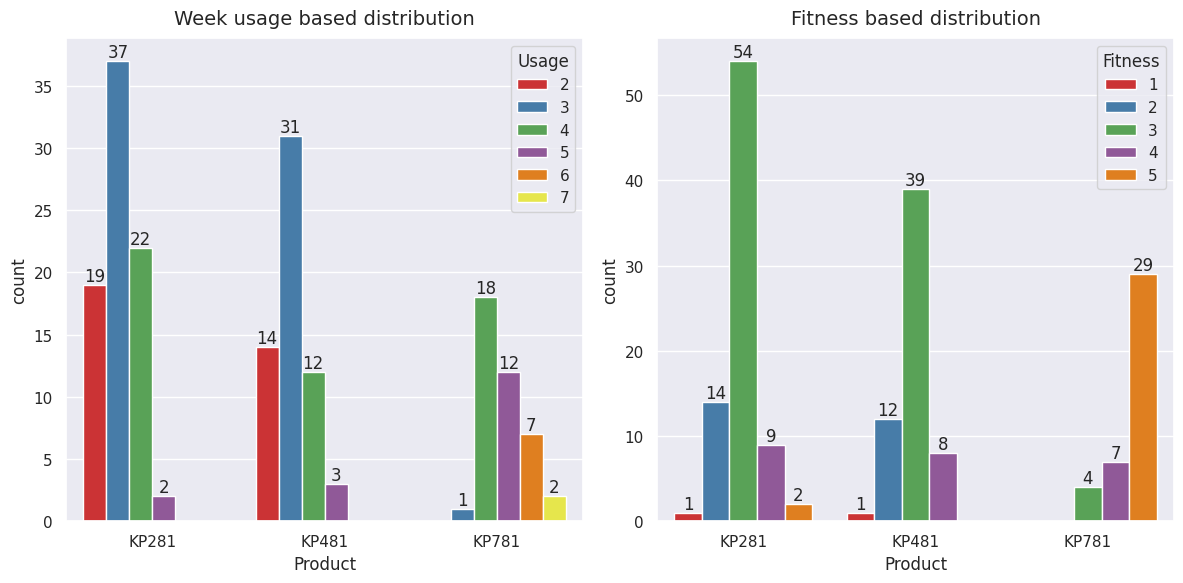

In [68]:
sns.set_style(style='darkgrid')

# size of the figure and subplots
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# AgeCategory Plot
AgeCategory = sns.countplot(data=df, x='Product', hue='Usage', palette='Set1', ax=axs[0])
for i in AgeCategory.containers:
    AgeCategory.bar_label(i)

# IncomeSlab Plot
IncomeSlab = sns.countplot(data=df, x='Product', hue='Fitness', palette='Set1', ax=axs[1])
for i in IncomeSlab.containers:
    IncomeSlab.bar_label(i)

# titles for subplots
axs[0].set_title("Week usage based distribution", pad=10, fontsize=14)
axs[1].set_title("Fitness based distribution", pad=10, fontsize=14)

plt.tight_layout()
plt.show()

#### Insights:-
- The majority of users across all three treadmill models have a usage frequency of 3 times per week, with KP281 having the highest count.

- KP781 has usage frequency of 4, 5, 6 & 7 times per week, shows that this is preferred by customers with a higher frequency of treadmill usage.

- Fitness ratings reveal that the majority of users across all treadmill models fall within the range of 2 to 4, with a higher count in the Fitness 3 category.

- KP781 attracts users with the highest fitness ratings (5), indicating its popularity among individuals who prioritize and maintain a high level of fitness.

## Correlation analysis among different factors

In [69]:
# Exclude non-numeric columns

numeric_df = df.select_dtypes(include=['int64'])

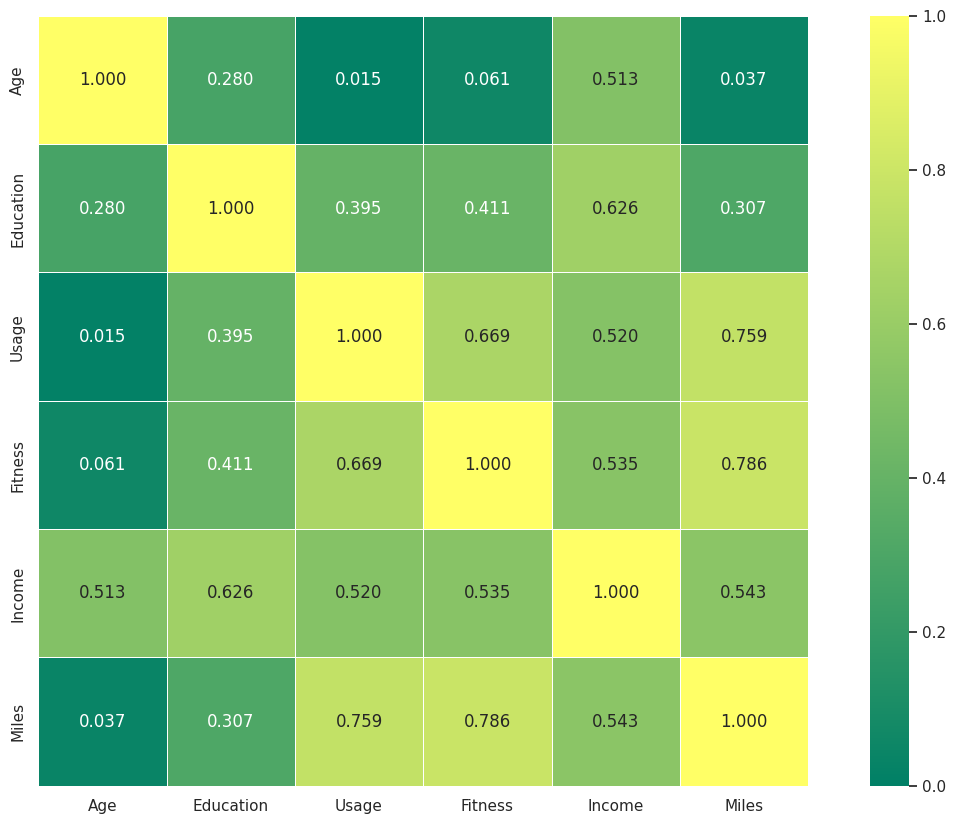

In [70]:
# Setting up the matplotlib figure
plt.figure(figsize=(16, 10))

ax = sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt='.3f',  # Used 3 decimal places for annotations
    linewidths=0.5,
    cmap='summer',
    vmin=-0, vmax=1,  # color scale limits for correlation
    square=True  # Make the heatmap square for better visual appeal
)

**Age:**

Age is positively correlated with Education and Income, indicating that older individuals tend to have higher levels of education and income.

**Education:**

Education is positively correlated with Income, Usage, and Fitness, suggesting that individuals with higher education levels tend to have higher incomes, use the treadmill more frequently, and maintain higher fitness levels.

**Usage:**

Usage has strong positive correlations with Fitness and Miles walked per week, indicating that more frequent treadmill usage is associated with higher fitness levels and covering a greater distance.

**Fitness:**

Fitness has a strong positive correlation with Miles walked per week, highlighting that individuals with higher fitness levels tend to walk more miles per week.

**Income:**

Income is positively correlated with Age, Education, Fitness, Usage, and Miles walked per week, indicating that individuals with higher incomes tend to be older, more educated, have higher fitness levels, use the treadmill more frequently, and walk more miles per week.

**Miles walked per week:**

Miles walked per week has the strongest positive correlation with Fitness and a substantial positive correlation with Usage, suggesting that individuals who walk more miles tend to have higher fitness levels and use the treadmill more frequently.


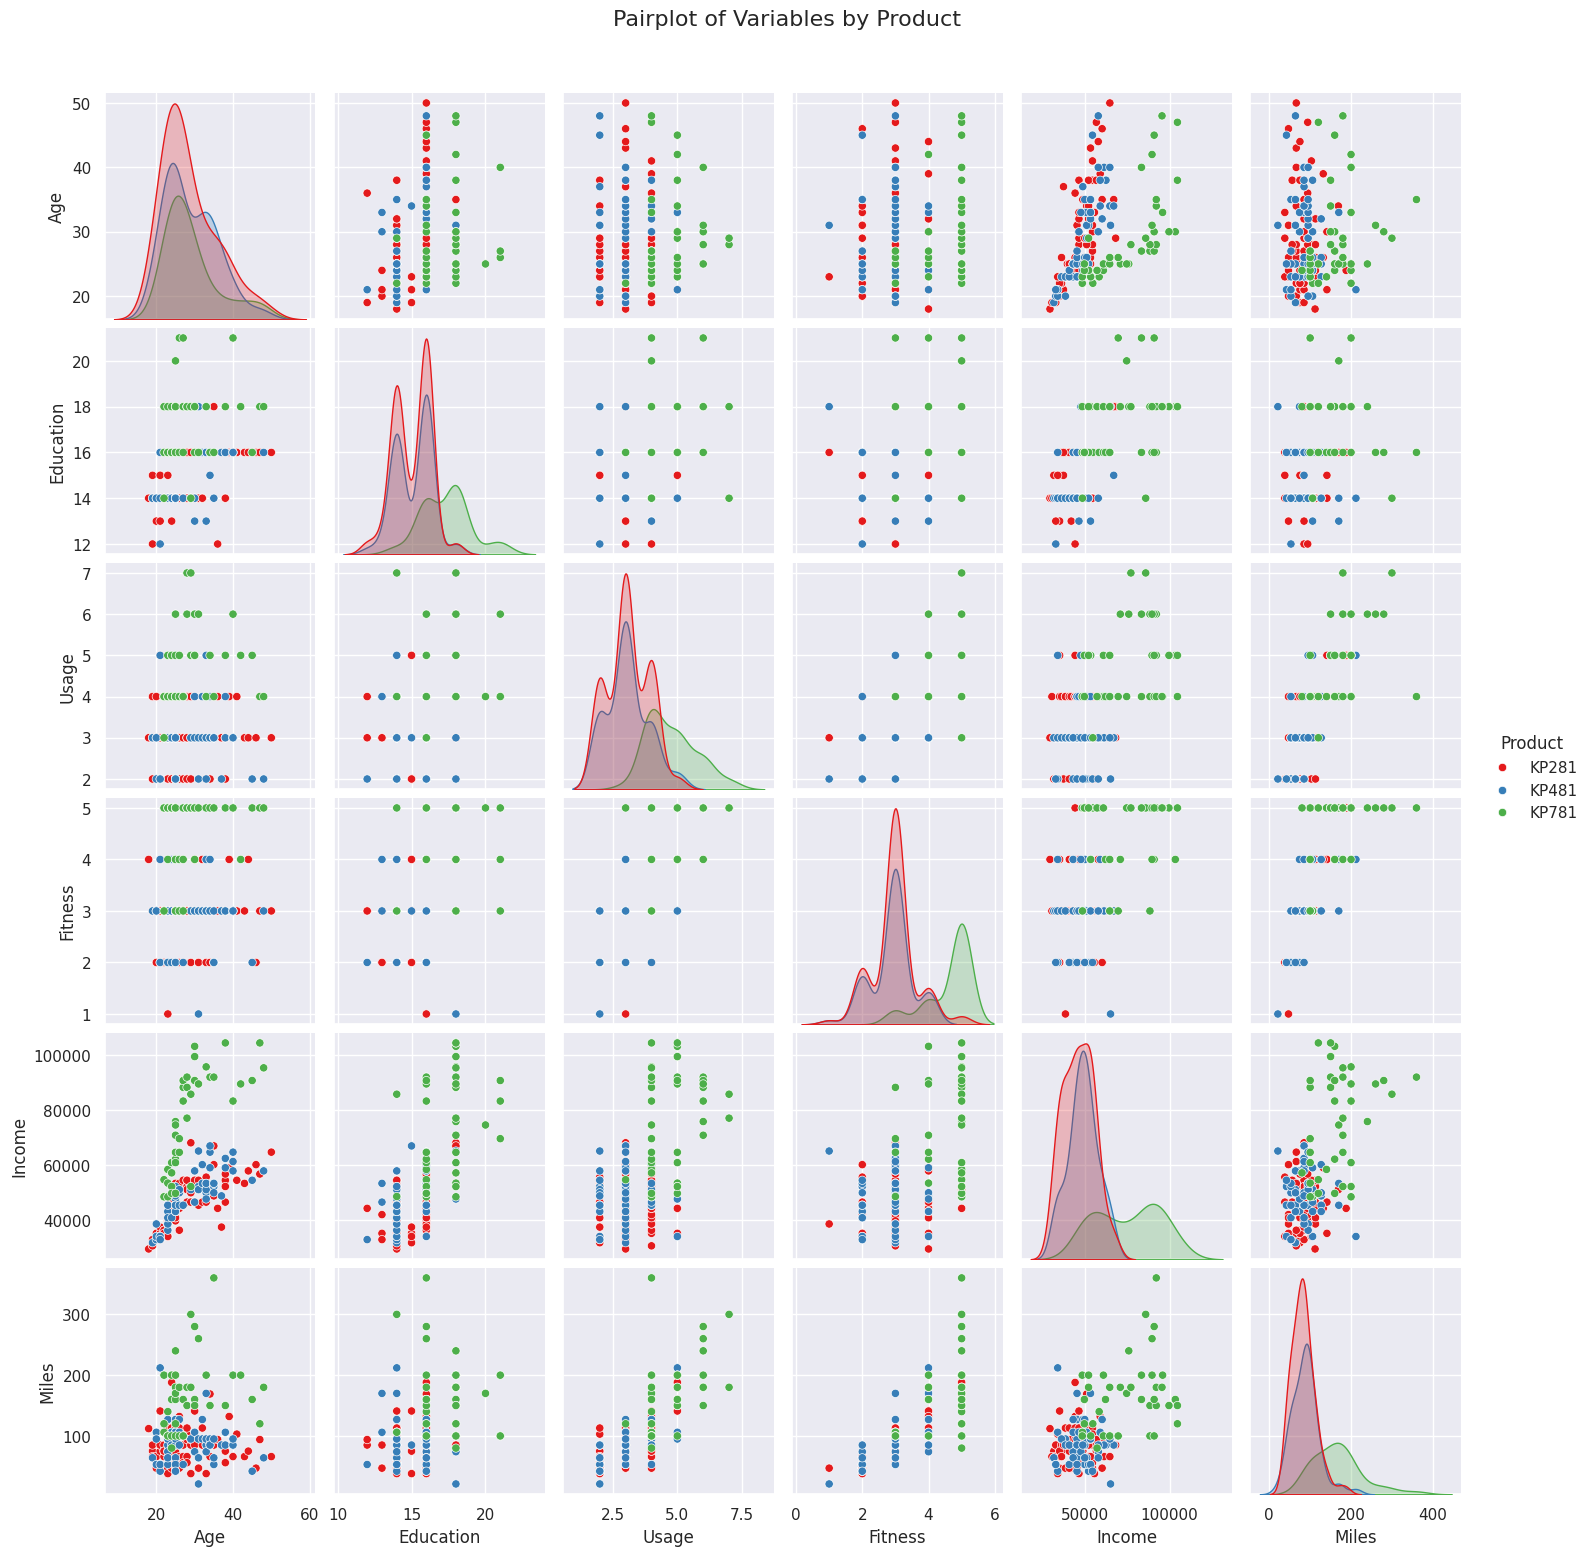

In [71]:
# Using a Pairplot to visualize relationships between above variables, especially in terms of distribution and correlation

sns.pairplot(df, hue="Product",
             palette= 'Set1')

plt.suptitle("Pairplot of Variables by Product",
             y= 1.04,
             fontsize=16)
plt.show()

## Descriptive Statistics Grouped by Product.

In [72]:
df.groupby("Product")['Age'].describe().reset_index().T

,0,1,2
Product,KP281,KP481,KP781
count,80.0,60.0,40.0
mean,28.55,28.9,29.1
std,7.221452,6.645248,6.971738
min,18.0,19.0,22.0
25%,23.0,24.0,24.75
50%,26.0,26.0,27.0
75%,33.0,33.25,30.25
max,50.0,48.0,48.0


### Age
- The average age across all products is similar, ranging from 28.55 to 29.1.
- Product KP781 has a slightly higher average age compared to the others.

In [73]:
df.groupby("Product")['Education'].describe().reset_index().T

,0,1,2
Product,KP281,KP481,KP781
count,80.0,60.0,40.0
mean,15.0375,15.116667,17.325
std,1.216383,1.222552,1.639066
min,12.0,12.0,14.0
25%,14.0,14.0,16.0
50%,16.0,16.0,18.0
75%,16.0,16.0,18.0
max,18.0,18.0,21.0


### Education
- The education level is relatively consistent across products.
- Product KP781 has a higher average education level (17.325) compared to the others.

In [74]:
df.groupby("Product")['Usage'].describe().reset_index().T

,0,1,2
Product,KP281,KP481,KP781
count,80.0,60.0,40.0
mean,3.0875,3.066667,4.775
std,0.782624,0.799717,0.946993
min,2.0,2.0,3.0
25%,3.0,3.0,4.0
50%,3.0,3.0,5.0
75%,4.0,3.25,5.0
max,5.0,5.0,7.0


### Usage
- Users of Product KP781 tend to use it more frequently, with an average usage of 4.775 times.
- Products KP281 and KP481 have lower average usage at 3.0875 and 3.066667, respectively.

In [75]:
df.groupby("Product")['Fitness'].describe().reset_index().T

,0,1,2
Product,KP281,KP481,KP781
count,80.0,60.0,40.0
mean,2.9625,2.9,4.625
std,0.66454,0.62977,0.667467
min,1.0,1.0,3.0
25%,3.0,3.0,4.0
50%,3.0,3.0,5.0
75%,3.0,3.0,5.0
max,5.0,4.0,5.0


### Fitness
- Users of Product KP781 have a higher average fitness level (4.625) compared to the other products.
- Fitness levels are relatively consistent for products KP281 and KP481.

In [76]:
df.groupby("Product")['Income'].describe().reset_index().T

,0,1,2
Product,KP281,KP481,KP781
count,80.0,60.0,40.0
mean,46418.025,48973.65,75441.575
std,9075.78319,8653.989388,18505.83672
min,29562.0,31836.0,48556.0
25%,38658.0,44911.5,58204.75
50%,46617.0,49459.5,76568.5
75%,53439.0,53439.0,90886.0
max,68220.0,67083.0,104581.0


### Income
- Product KP781 is associated with higher average income (75441.575) compared to the other products.
- Product KP281 has the lowest average income at 46418.025.

In [77]:
df.groupby("Product")['Miles'].describe().reset_index().T

,0,1,2
Product,KP281,KP481,KP781
count,80.0,60.0,40.0
mean,82.7875,87.933333,166.9
std,28.874102,33.263135,60.066544
min,38.0,21.0,80.0
25%,66.0,64.0,120.0
50%,85.0,85.0,160.0
75%,94.0,106.0,200.0
max,188.0,212.0,360.0


### Miles
- Users of Product KP781 tend to cover more miles on average (166.9) compared to the other products.
- Product KP281 has the lowest average miles covered at 82.7875.

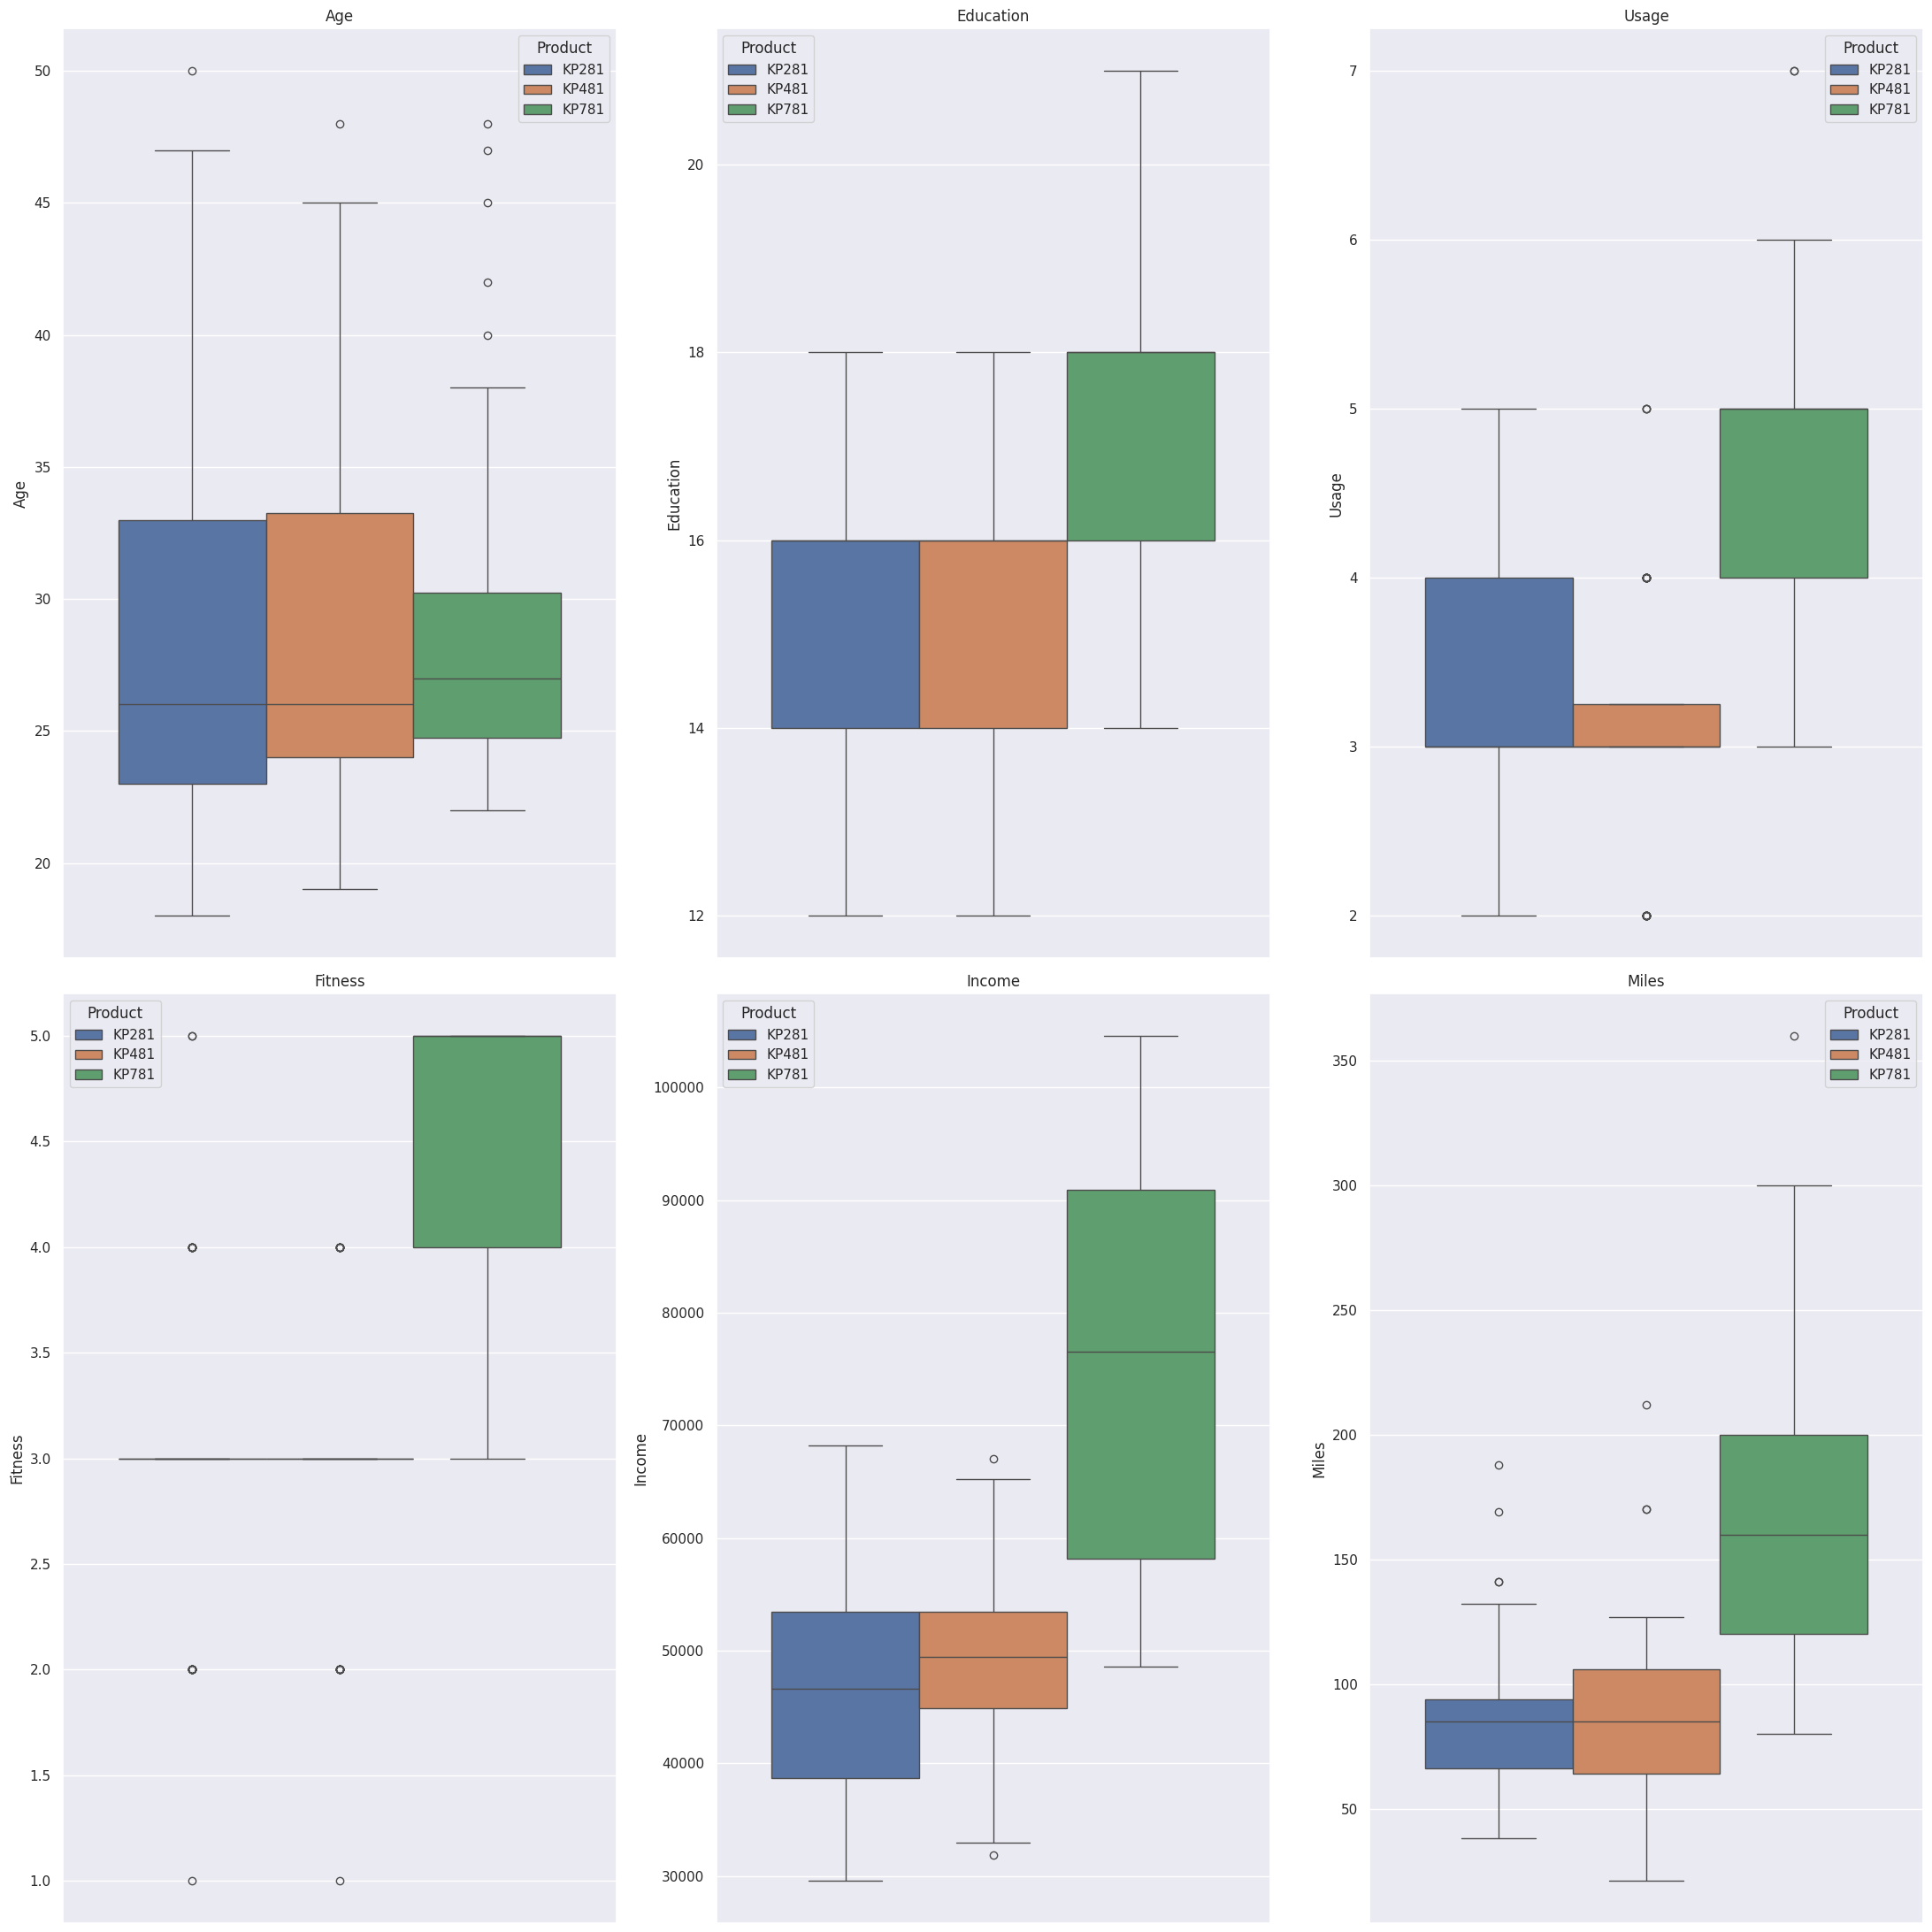

In [78]:
# Boxplots of Product Distribution for Various Variables.

fig, axes = plt.subplots(2, 3, figsize=(22, 22))
sns.set(style="darkgrid")

# Iterate through the rows and columns of the subplot grid
for i in range(2):
    for j in range(3):
        variable = columns[i * 3 + j] # Variable assignment for Subplot Analysis
        sns.boxplot(ax=axes[i, j], data=df, y=variable, hue="Product")
        axes[i, j].set_title(variable)

plt.tight_layout()
plt.show();

## Marginal Probability of customer buying

In [79]:
product = (df["Product"].value_counts(normalize=True)*100).T.round(2)

product

,proportion
Product,
KP281,44.44
KP481,33.33
KP781,22.22


Product KP281 is : 44.44 % (cheapest / entry level product)

Product KP481 is : 33.33 % (intermediate user level product)

Product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

In [80]:
mp_of_gender = (pd.crosstab(df['Product'],df['Gender'],margins = True, normalize = True)*100).T.round(2)

mp_of_gender

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.22,16.11,3.89,42.22
Male,22.22,17.22,18.33,57.78
All,44.44,33.33,22.22,100.00


**Probability of gender**

 - Probability of Male Customer Purchasing any product is : 57.77 %

 - Probability of Female Customer Purchasing any product is : 42.22 %

In [81]:
mp_of_marital = (pd.crosstab(df['Product'],df['MaritalStatus'],margins = True, normalize = True)*100).T.round(2)

mp_of_marital

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.67,20.00,12.78,59.44
Single,17.78,13.33,9.44,40.56
All,44.44,33.33,22.22,100.00


**Probability of MaritalStatus**

 - Probability of Partnered Customer Purchasing any product is : 59.44 %

 - Probability of Single Customer Purchasing any product is : 40.56 %

In [82]:
mp_of_Age = (pd.crosstab(df['Product'],df['AgeCategory'],margins = True, normalize = True)*100).T.round(2)

mp_of_Age

Product,KP281,KP481,KP781,All
AgeCategory,,,,
Teens,3.33,2.22,0.00,5.56
Young Adults,27.22,17.22,16.67,61.11
Adults,10.56,12.78,3.33,26.67
Over 40s,3.33,1.11,2.22,6.67
All,44.44,33.33,22.22,100.00


**Probability of Age**

 - Probability of Teens Purchasing any product is : 5.56 %

 - Probability of Young Adults Purchasing any product is : 61.11 %

 - Probability of Adults Purchasing any product is : 26.67 %
  
 - Probability of Over 40s customers Purchasing any product is : 6.67 %

In [83]:
mp_of_income = (pd.crosstab(df['Product'],df['IncomeSlab'],margins = True, normalize = True)*100).T.round(2)

mp_of_income

Product,KP281,KP481,KP781,All
IncomeSlab,,,,
Low Income,4.44,3.33,0.00,7.78
Middle-class,36.67,26.11,6.11,68.89
Upper-Middle class,3.33,3.89,6.67,13.89
Wealthy,0.00,0.00,9.44,9.44
All,44.44,33.33,22.22,100.00


**Probability of Income**

 - Probability of Low Income customers Purchasing any product is : 7.78 %

 - Probability of Middle-class customers Purchasing any product is : 68.89 %

 - Probability of Upper-Middle class customers Purchasing any product is : 13.89 %
  
 - Probability of Wealthy customers Purchasing any product is : 9.44 %

## Conditional probability

In [84]:
cp_of_gender = (pd.crosstab(df['Product'],df['Gender'],margins=True,normalize="columns")*100).T.round(2)

cp_of_gender

Product,KP281,KP481,KP781
Gender,,,
Female,52.63,38.16,9.21
Male,38.46,29.81,31.73
All,44.44,33.33,22.22


**Probability (Product | Female)**

KP281 | Female = 52.63 %

KP481 | Female = 38.16 %

KP781 | Female = 9.21 %

**Probability (Product | Male)**

KP281 | male = 38.46 %

KP481 | male = 29.81 %

KP781 | male = 31.73 %

#### Insights:-

- Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

- KP281 is more recommended for female customers.

- Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

- Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

- KP481 product is specifically recommended for Female customers who are intermediate user.

In [85]:
cp_of_marital = (pd.crosstab(df['Product'],df['MaritalStatus'],margins=True,normalize='columns')*100).T.round(2)

cp_of_marital

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,44.86,33.64,21.50
Single,43.84,32.88,23.29
All,44.44,33.33,22.22


**Probability (Product | Partnered)**

KP281 | Partnered = 44.86 %

KP481 | Partnered = 33.64 %

KP781 | Partnered = 21.50 %

**Probability (Product | Single)**

KP281 | Single = 43.84 %

KP481 | Single = 32.88 %

KP781 | Single = 23.29 %

#### Insights:-

- KP281 is slightly more favored by partnered customers (44.86%) compared to single customers (43.84%).

- KP481 enjoys consistent popularity across both partnered (33.64%) and single (32.88%) customers.

- KP781, an advanced product, has a lower probability of selection.

- But shows a slightly higher preference among single customers (23.29%) compared to partnered customers (21.50%).

In [86]:
cp_of_Age = (pd.crosstab(df['Product'],df['AgeCategory'],margins = True, normalize = 'columns')*100).T.round(2)

cp_of_Age

Product,KP281,KP481,KP781
AgeCategory,,,
Teens,60.00,40.00,0.00
Young Adults,44.55,28.18,27.27
Adults,39.58,47.92,12.50
Over 40s,50.00,16.67,33.33
All,44.44,33.33,22.22


**Probability (Product | Partnered)**

KP281 | Teens = 60 %

KP481 | Teens = 40 %

KP781 | Teens = 0 %

**Probability (Product | Single)**

KP281 | Young Adults = 44.55 %

KP481 | Young Adults = 28.18 %

KP781 | Young Adults = 27.27 %

**Probability (Product | Partnered)**

KP281 | Adults = 39.58 %

KP481 | Adults = 47.92 %

KP781 | Adults = 12.50 %

**Probability (Product | Single)**

KP281 | Over 40s = 50 %

KP481 | Over 40s = 16.67 %

KP781 | Over 40s = 33.33 %

#### Insights:-

- Among teens, KP281 is the predominant choice (60%), while KP481 is chosen by 40%. KP781 does not seem to appeal to this age group.

- In the young adults category, KP281 has a slightly higher preference (44.55%) compared to KP481 (28.18%) and KP781 (27.27%).

- Among adults, there is a balanced distribution. KP481 is the most favored (47.92%), followed by KP281 (39.58%), KP781 with a low preference (12.50%).

- Customers over 40 show a clear preference for KP281 (50%), followed by KP781 (33.33%), while KP481 has a lower preference (16.67%).

In [87]:
cp_of_Income = (pd.crosstab(df['Product'],df['IncomeSlab'],margins = True, normalize = 'columns')*100).T.round(2)

cp_of_Income

Product,KP281,KP481,KP781
IncomeSlab,,,
Low Income,57.14,42.86,0.00
Middle-class,53.23,37.90,8.87
Upper-Middle class,24.00,28.00,48.00
Wealthy,0.00,0.00,100.00
All,44.44,33.33,22.22


**Probability (Product | Partnered)**

KP281 | Low Income = 57.14 %

KP481 | Low Income = 42.86 %

KP781 | Low Income = 0 %

**Probability (Product | Single)**

KP281 | Middle-class = 53.23 %

KP481 | Middle-class = 37.90 %

KP781 | Middle-class = 8.87 %

**Probability (Product | Partnered)**

KP281 | Upper-Middle class = 24 %

KP481 | Upper-Middle class = 28 %

KP781 | Upper-Middle class = 48 %

**Probability (Product | Single)**

KP281 | Wealthy = 0 %

KP481 | Wealthy = 0 %

KP781 | Wealthy = 100 %

#### Insights:-

- In the Low-Income category, KP281 is dominant (57.14%), while KP481 is chosen by 42.86%. KP781 doesn't seem to be preferred in this income bracket.

- Among the Middle-Class, KP281 remains popular (53.23%), followed by KP481 (37.90%), and KP781 has a lower preference (8.87%).

- In the Upper-Middle class,KP781 being the most favored (48.00%), followed by KP481 (28.00%), and KP281 has a lower preference (24.00%).

- Among the Wealthy, KP781 is the exclusive choice (100.00%), with KP281 and KP481 having no preference.

# Customer Profiling

### KP281

- **Affordable Entry-Level Choice:** KP281 is a budget-friendly option and the best-selling product.<br><br>

- **Popularity Among Beginners:** It's favored by entry-level customers, both male and female.<br><br>

- **Usage Patterns:** Typically used 3 to 4 times a week, covering 70 to 90 miles.<br><br>

- **Fitness Rating:** Most customers rate their fitness as average.<br><br>

- **Demographic Preferences:** Attracts younger to elder beginners, especially preferred by single females and partnered males.<br><br>

- **Income Range:** Preferred by customers with incomes between 39K to 53K.<br><br>

### KP481

- **Intermediate Level Product:** KP481 is an intermediate-level treadmill.<br><br>

- **Usage Characteristics:** Customers cover 70 to 130 miles per week, with usage averaging 3 days.<br><br>

- **Fitness and Mileage Focus:** Fitness level varies from bad to average, and the focus is on covering more miles.<br><br>

- **Demographic Preferences:** More popular among females, recommended for intermediate female users.<br><br>

- **Age Groups:** Attracts customers across different age groups - teens, adults, and middle-aged.<br><br>

- **Income and Relationship Preferences:** Average income around 49K, more preferred by partnered customers.<br><br>

### KP781

- **Advanced and High-Priced:** KP781 is an advanced and higher-priced product.<br><br>

- **Distance and Usage:** Customers cover 120 to 200+ miles per week, using it 4 to 5 times.<br><br>

- **Fitness Rating:** Users rate their fitness as excellent.<br><br>

- **Demographic Insights:** Preferred by middle to higher age groups, especially single individuals with higher exercise levels.<br><br>

- **Gender Preference:** More favored by males, especially those with extensive exercise routines.<br><br>

- **Income Influence:** Preferred by higher-income individuals, correlated with higher education.<br><br>

- **Experience Factor:** Attracts customers familiar with previous aerofit products.<br><br>

- **Partnered Preference:** Partnered females show a preference for KP781.<br><br>



### Recommendations

1.**Targeted Marketing for Female Customers:**

Given the low engagement of females with exercise equipment, it is recommended to launch a targeted marketing campaign to encourage and promote female participation in fitness activities.

2.**Strategic Pricing for KP281 and KP481:**

Analyzing customer preferences, it is advised to position KP281 and KP481 treadmills as budget-friendly options, particularly catering to customers with an annual income in the range of 39K - 53K dollars.

3.**Premium Marketing for KP781:**

Capitalize on the advanced features of the KP781 treadmill by positioning it as a premium product suitable for professionals and athletes. Implement marketing strategies involving influencers and international athletes to enhance product visibility.

4.**Market Expansion Research:**

Conduct thorough research to assess the feasibility of expanding the market beyond the age of 50. Explore potential health benefits and drawbacks to tailor marketing strategies effectively.

5.**Customer Support and Upgrade Recommendations:**

Establish a robust customer support system and implement recommendations for users to consider upgrading from lower treadmill versions to higher-level models based on their consistent usage patterns.

6.**Targeted Promotion of KP781 for Female Customers:**

Promote the KP781 model specifically to female customers who engage in extensive exercise routines. Provide user-friendly guidance to enhance the appeal of this advanced treadmill.

7.**Age-Specific Marketing for KP781:**

Tailor marketing efforts for individuals above 40 years, positioning the KP781 as a suitable choice. Emphasize health benefits and usability features to attract this demographic.


In [88]:
!zip -r project.zip .
from google.colab import files
files.download('project.zip')

  adding: .config/ (stored 0%)
  adding: .config/default_configs.db (deflated 98%)
  adding: .config/active_config (stored 0%)
  adding: .config/logs/ (stored 0%)
  adding: .config/logs/2025.07.29/ (stored 0%)
  adding: .config/logs/2025.07.29/13.36.27.119914.log (deflated 58%)
  adding: .config/logs/2025.07.29/13.36.15.785307.log (deflated 57%)
  adding: .config/logs/2025.07.29/13.36.25.001588.log (deflated 86%)
  adding: .config/logs/2025.07.29/13.36.37.567476.log (deflated 56%)
  adding: .config/logs/2025.07.29/13.35.49.066514.log (deflated 92%)
  adding: .config/logs/2025.07.29/13.36.36.776594.log (deflated 57%)
  adding: .config/.last_opt_in_prompt.yaml (stored 0%)
  adding: .config/.last_update_check.json (deflated 22%)
  adding: .config/.last_survey_prompt.yaml (stored 0%)
  adding: .config/config_sentinel (stored 0%)
  adding: .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: .config/gce (stored 0%)
  adding: .config/configurations/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>